In [49]:
import Parser, Deriver, Interpreter, Analyser, SelfOrg
import numpy as np
import math

In [50]:
modelName = 'dereffye'

In [51]:
# Have to generate manually as we want points to be same for render and stats.
# We also want to be able to access some inner stuff for plotting

In [52]:
Specification   = Parser.parse('Specifications/'+modelName+'.txt', {})

In [53]:
n               = Specification['depth']
axiom           = Specification['axiom']
tree            = [axiom]
tree            = Deriver.derive(tree,n)

In [54]:
scale = 1

In [55]:
points = []

if Specification['self_org'] == False:

    # DERIVE
    n               = Specification['depth']
    axiom           = Specification['axiom']
    tree            = [axiom]
    tree            = Deriver.derive(tree,n)

    # INTERPRET
    points, scale   = Interpreter.interpret(tree, True, return_scale=True)

else:

    # DERIVE AND INTERPRET TOGETHER
    n               = Specification['depth']
    axiom           = Specification['axiom']
    tree            = [axiom]
    num_voxels      = Specification['num_voxels']
    shadow_height   = Specification['shadow_height']
    shadow_width    = Specification['shadow_width']
    decrement_close = Specification['dec_close']
    decrement_far   = Specification['dec_far']

    for i in range(0,n):
        tree = Deriver.derive(tree,1)
        points, scale = Interpreter.interpret(tree, True, return_scale = True)
        voxels          = SelfOrg.calc_light(points,
                                             num_voxels,
                                             shadow_height,
                                             shadow_width,
                                             decrement_close,
                                             decrement_far)
        SelfOrg.update_cells(tree, voxels, scale)
        print("Interpreted for the "+str(i+1)+"th time.")

In [56]:
# So we can view what we visualised
print("writing to file...")
with open("data.dat", mode="w") as f:
    f.write(str(len(points))+"\n")
    for p in points:
        x,y,z,r,a,b,c,d,l = p
        x /= scale
        y /= scale
        y -= 0.5
        z /= scale
        r /= scale
        line = [x,y,z,r,l]
        for feature in line:
            f.write(str(feature)+"\t")
        f.write("\n")
print("done writing.")

writing to file...
done writing.


In [57]:
points[0]

(0, 0, 0, 10.0, 0.0, 270.0, 0.0, 39.065380785247996, 0.0)

In [58]:
points[1]

(1.464717174902156e-31,
 39.065380785247996,
 -2.392064676806324e-15,
 7.0,
 0.0,
 270.0,
 0.0,
 39.065380785247996,
 0.0)

In [59]:
points[2]
full_points = points
full_points = np.array(points)

In [60]:
points = points[2:]

In [61]:
metrics         = Analyser.analyse(points)

In [62]:
vertices        = np.array(points)

In [63]:
for (k,v) in metrics.items():
    print(k, ':', v)

parentAngle_mean : 22.45261381906454
parentAngle_variance : 25.541388170407725
length_mean : 1.3183480413712612
length_variance : 1.1193973256751228
verticalOrientation_mean : 75.58870603641132
verticalOrientation_variance : 36.88176937895375
horizontalOrientation_mean : 175.71356355603044
horizontalOrientation_variance : 104.62829155157512
q1_xyz : (87.68028101469145, 66.97936639877554, 143.8901494177208)
q2_xyz : (166.4849813843759, 90.33279725683727, 252.96466060309854)
q3_xyz : (144.057675829623, 91.59363120284533, 176.20459037431013)
xyz : (166.4849813843759, 247.02307109210324, 252.96466060309854)
trunk_length : 39.065380785247996
totalBiomass : 25367.781056913


In [64]:
math.degrees(metrics['parentAngle_mean'])

1286.440010869507

In [65]:
vertices[:,5].mean()

175.71356355602944

In [66]:
import matplotlib.pyplot as plt

In [67]:
#Fed up of accessing via numerical values
# Format of points is:
# 0--1--2--3--4--5--6--7--8
# x  y  z  r  vA hA pA l--leaf
keys = {
    'x': 0,
    'y': 1,
    'z': 2,
    'radius': 3,
    'vertical orientation': 4,
    'horizontal orientation': 5,
    'parent angle': 6,
    'length': 7,
    'leaf': 8
}

(array([32766.,     0.,     0.,     0.,     0.,     0.,     0.,   920.,
         1158.,  1130.,  1074.,  1200.,  1100.,  1116.,  1112.,  1120.,
         1176.,  1222.,  1100.,  1184.,  1142.,  1132.,  1116.,  1184.,
         1156.,  1108.,  1202.,  1122.,  1186.,  1254.,  1138.,  1066.,
         1084.,  1054.,  1080.,  1130.]),
 array([ 0.        ,  2.08326264,  4.16652528,  6.24978792,  8.33305056,
        10.4163132 , 12.49957584, 14.58283848, 16.66610112, 18.74936376,
        20.8326264 , 22.91588904, 24.99915168, 27.08241432, 29.16567696,
        31.2489396 , 33.33220224, 35.41546488, 37.49872752, 39.58199016,
        41.6652528 , 43.74851544, 45.83177808, 47.91504072, 49.99830336,
        52.081566  , 54.16482864, 56.24809129, 58.33135393, 60.41461657,
        62.49787921, 64.58114185, 66.66440449, 68.74766713, 70.83092977,
        72.91419241, 74.99745505]),
 <a list of 36 Patch objects>)

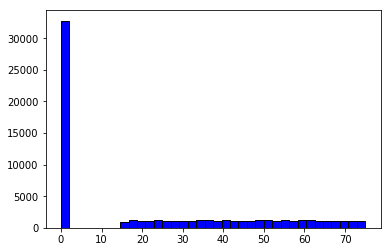

In [109]:
plt.hist(vertices[:,keys['parent angle']], color='blue', edgecolor='black', bins=36)

In [69]:
max_height = np.max(vertices[:,keys['y']])

In [70]:
lower_third  = full_points[full_points[:,keys['y']] < max_height/3]
middle_third = full_points[full_points[:,keys['y']] < 2*max_height/3]
middle_third = middle_third[middle_third[:,keys['y']] > max_height/3]
upper_third = full_points[full_points[:,keys['y']] > 2*max_height/3]

In [71]:
points[0]

(1.464717174902156e-31,
 39.065380785247996,
 -2.392064676806324e-15,
 7.0,
 66.22206704593091,
 90.00000000000001,
 66.22206704593091,
 20.934619214752008,
 0.0)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.,  23.,
         53.,  76., 168., 210., 230., 239., 225., 232., 163., 180., 180.,
        403., 342., 277., 224., 232., 241., 439., 384., 598., 542., 616.,
        857., 916., 871.]),
 array([ 0.        ,  2.50377007,  5.00754014,  7.51131022, 10.01508029,
        12.51885036, 15.02262043, 17.5263905 , 20.03016057, 22.53393065,
        25.03770072, 27.54147079, 30.04524086, 32.54901093, 35.05278101,
        37.55655108, 40.06032115, 42.56409122, 45.06786129, 47.57163136,
        50.07540144, 52.57917151, 55.08294158, 57.58671165, 60.09048172,
        62.5942518 , 65.09802187, 67.60179194, 70.10556201, 72.60933208,
        75.11310215, 77.61687223, 80.1206423 , 82.62441237, 85.12818244,
        87.63195251, 90.13572259]),
 <a list of 36 Patch objects>)

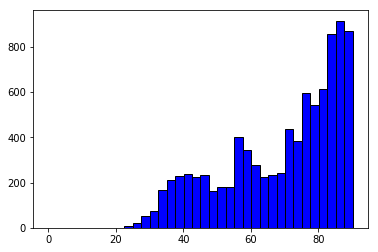

In [72]:
plt.hist(lower_third[:,keys['y']], color='blue', edgecolor='black', bins=36)

(array([  73.,  281.,  599.,  856.,  788.,  609.,  827.,  775.,  646.,
         588.,  867., 1306., 1514., 1179., 1018.,  965., 1495.,  936.,
         724.,  522.,  689., 1328., 1342., 1816., 1547., 1501., 1629.,
        1737., 1288.,  869., 1015.,  626.,  533.,  214.,  120.,   34.]),
 array([-75.79738342, -71.1731774 , -66.54897138, -61.92476536,
        -57.30055935, -52.67635333, -48.05214731, -43.42794129,
        -38.80373527, -34.17952925, -29.55532323, -24.93111721,
        -20.30691119, -15.68270517, -11.05849915,  -6.43429313,
         -1.81008711,   2.81411891,   7.43832493,  12.06253095,
         16.68673697,  21.31094298,  25.935149  ,  30.55935502,
         35.18356104,  39.80776706,  44.43197308,  49.0561791 ,
         53.68038512,  58.30459114,  62.92879716,  67.55300318,
         72.1772092 ,  76.80141522,  81.42562124,  86.04982726,
         90.67403328]),
 <a list of 36 Patch objects>)

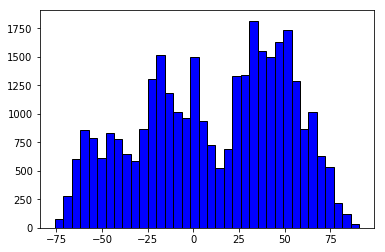

In [73]:
plt.hist(middle_third[:,keys['x']], color='blue', edgecolor='black', bins=36)

(array([   5.,    0.,    5.,    0.,    0.,    7.,  207.,  397.,  714.,
         820., 1231., 1589., 1638., 2064., 1882., 1492., 1441., 1545.,
        1225., 1028., 1019.,  884.,  838.,  629.,  392.,  220.,  228.,
         529.,  455.,  582.,  379.,  166.,   49.,   23.,   50.,   13.]),
 array([-53.58825836, -49.58712804, -45.58599772, -41.5848674 ,
        -37.58373709, -33.58260677, -29.58147645, -25.58034613,
        -21.57921581, -17.57808549, -13.57695517,  -9.57582485,
         -5.57469454,  -1.57356422,   2.4275661 ,   6.42869642,
         10.42982674,  14.43095706,  18.43208738,  22.4332177 ,
         26.43434801,  30.43547833,  34.43660865,  38.43773897,
         42.43886929,  46.43999961,  50.44112993,  54.44226025,
         58.44339056,  62.44452088,  66.4456512 ,  70.44678152,
         74.44791184,  78.44904216,  82.45017248,  86.4513028 ,
         90.45243312]),
 <a list of 36 Patch objects>)

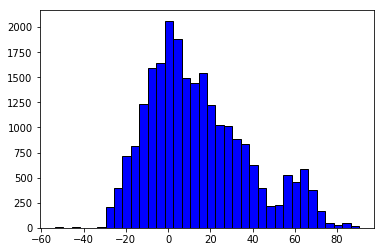

In [74]:
plt.hist(upper_third[:,keys['x']], color='blue', edgecolor='black', bins=36)

In [75]:
# Problem with these graphs is that they weight all nodes equally, regardless of size and mass
# Create metric that calculates biomass for each thing, then adds that many of itself to distribution.

weighted_ps = []

In [76]:
vertices.shape[0]/2

32766.0

In [77]:
ps = zip(points[::2], points[1::2])

In [78]:
points[30]

(-3.7412933215031847,
 72.41990232537528,
 34.017151388775204,
 0.5764800999999997,
 87.02973703538255,
 95.61659279961076,
 0.0,
 1.3881095828098,
 0.0)

In [79]:
weights = np.array([Analyser.volumeOfConic(r1,r2,l) for ((x,y,z,r1,va,ha,pa,l,leaf),(x2,y2,z2,r2,va2,ha2,pa2,l2,leaf)) in ps])

In [80]:
weights.sum()

25367.781056917036

In [81]:
log_weights = [(Analyser.volumeOfConic(r1,r2,l)) for ((x,y,z,r1,va,ha,pa,l,leaf),(x2,y2,z2,r2,va2,ha2,pa2,l2,leaf)) in ps]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([0.        , 0.02777778, 0.05555556, 0.08333333, 0.11111111,
        0.13888889, 0.16666667, 0.19444444, 0.22222222, 0.25      ,
        0.27777778, 0.30555556, 0.33333333, 0.36111111, 0.38888889,
        0.41666667, 0.44444444, 0.47222222, 0.5       , 0.52777778,
        0.55555556, 0.58333333, 0.61111111, 0.63888889, 0.66666667,
        0.69444444, 0.72222222, 0.75      , 0.77777778, 0.80555556,
        0.83333333, 0.86111111, 0.88888889, 0.91666667, 0.94444444,
        0.97222222, 1.        ]),
 <a list of 36 Patch objects>)

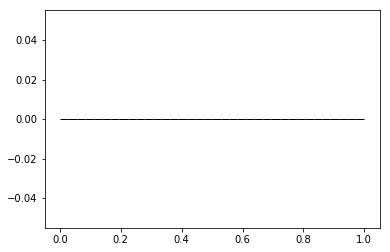

In [82]:
plt.hist(log_weights, color='black', edgecolor='black', bins=36)

In [83]:
n = weights.shape[0]
n

32766

In [84]:
import math

In [85]:
points[34]

(-3.8769666369214812,
 72.49183090373704,
 35.39674090924376,
 0.4035360699999998,
 87.02973703538255,
 95.61659279961076,
 0.0,
 1.3881095828098,
 0.0)

In [86]:
for i in range(n):
    for j in range(math.floor(math.log(weights[i]))):
        weighted_ps.append(points[2*i])

In [106]:
weighted_ps = np.array(weighted_ps)
weighted_ps.shape
weighted_ps[3]

array([ 1.46471717e-31,  3.90653808e+01, -2.39206468e-15,  7.00000000e+00,
        6.62220670e+01,  9.00000000e+01,  6.62220670e+01,  2.09346192e+01,
        0.00000000e+00])

(array([465.,   0.,   0.,   0.,   0.,   0.,   0.,  12.,   3.,  10.,  11.,
          8.,  15.,  12.,  17.,   9.,   8.,   7.,   5.,   9.,  11.,   5.,
         15.,   9.,   7.,   1.,  25.,  11.,  17.,  18.,  13.,   9.,  13.,
         11.,  16.,  18.]),
 array([ 0.        ,  2.06100516,  4.12201031,  6.18301547,  8.24402062,
        10.30502578, 12.36603094, 14.42703609, 16.48804125, 18.5490464 ,
        20.61005156, 22.67105671, 24.73206187, 26.79306703, 28.85407218,
        30.91507734, 32.97608249, 35.03708765, 37.09809281, 39.15909796,
        41.22010312, 43.28110827, 45.34211343, 47.40311859, 49.46412374,
        51.5251289 , 53.58613405, 55.64713921, 57.70814437, 59.76914952,
        61.83015468, 63.89115983, 65.95216499, 68.01317014, 70.0741753 ,
        72.13518046, 74.19618561]),
 <a list of 36 Patch objects>)

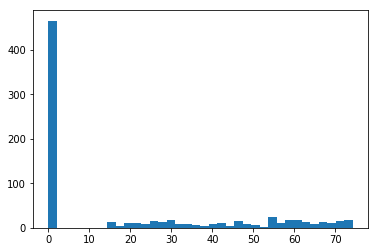

In [108]:
plt.hist(weighted_ps[:, keys['parent angle']], bins=36)

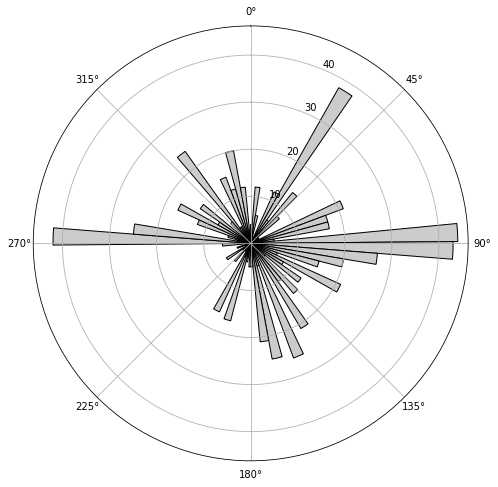

<Figure size 432x288 with 0 Axes>

In [105]:
degrees = weighted_ps[:,keys['horizontal orientation']]
radians = np.deg2rad(degrees)

bin_size = 5
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.show()
plt.savefig("metrics_vo.png")

In [90]:
leaves = vertices[vertices[:, 8] == 1]

In [91]:
vertices.shape

(65532, 9)

In [92]:
leaves.shape

(32768, 9)

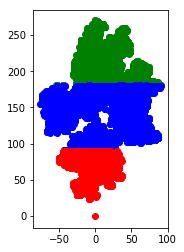

<Figure size 432x288 with 0 Axes>

In [104]:
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(upper_third[:,0], upper_third[:,1], color='green')
plt.scatter(middle_third[:,0], middle_third[:,1], color='blue')
plt.scatter(lower_third[:,0], lower_third[:,1], color='red')
plt.show()
plt.savefig('z.png')

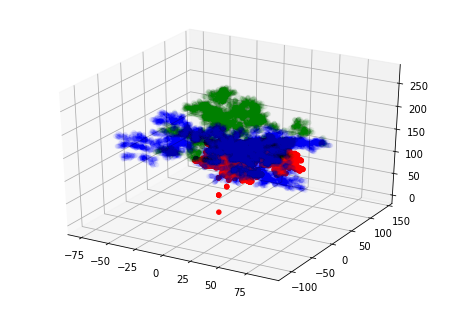

In [97]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = middle_third[:,0]
sequence_containing_y_vals = middle_third[:,2]
sequence_containing_z_vals = middle_third[:,1]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='blue', alpha=0.01)

sequence_containing_x_vals = upper_third[:,0]
sequence_containing_y_vals = upper_third[:,2]
sequence_containing_z_vals = upper_third[:,1]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='green', alpha=0.01)

sequence_containing_x_vals = lower_third[:,0]
sequence_containing_y_vals = lower_third[:,2]
sequence_containing_z_vals = lower_third[:,1]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, color='red', alpha=1)

pyplot.show()